In [2]:
import requests  
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import os
import sys

In [77]:
df = pd.read_csv('TheList.csv')
df['Unnamed: 1'].astype(int)
df

,found dead,Unnamed: 1,"name, gender, age",region of origin,cause of death,source,Unnamed: 6
0,05/05/18,4,N.N. (1 man),Africa,1 died off coast of Tripoli (LY) after Libyan ...,AFP/IOM Libya/BangkokPost,NaN
1,30/04/18,2,N.N. (2 men),unknown,bodies recovered in Gasr Garabulli (aka Castel...,IOM Libya,NaN
2,30/04/18,1,N.N. (woman),unknown,body recovered on Tajoura beach (LY),IOM Libya,NaN
3,30/04/18,6,N.N. (1 baby; 5 men),unknown,bodies recovered in Zuwara (LY),IOM Libya,NaN
4,30/04/18,1,N.N. (man),Algeria,drowned trying to swim across the Kolpa River ...,IOM Slovenia/TotSloveniaNews,NaN
5,29/04/18,19,N.N. (1 man),Africa,"16 drowned in shipwreck off Cap Falcon, Oran (...",ObsAlgerie/Caminando/EFE/Réf/QUOTI/IOM,NaN
6,25/04/18,17,N.N.,Sub-Saharan Africa,5 drowned afer boat sank between Morocco and S...,ElDiario/Caminando/SalvaM/EuroPress,NaN
7,22/04/18,11,N.N. (1 boy; 10 men),unknown,drowned when rubber dinghy overturned in the M...,MEE/Reu./IOM Libya/JapanTimes,NaN
8,20/04/18,1,"N.N. (boy, 6 months)",Eritrea,strangled by desperate mother who hanged herse...,Berliner Ztg/FR-th/OTZ,NaN
9,20/04/18,1,"Snaid Tadese (woman, 19)",Eritrea,"suicide, strangled her baby and hanged herself...",Berliner Ztg/FR-th/OTZ,NaN


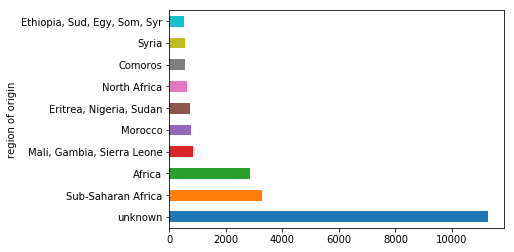

In [87]:
df.groupby('region of origin')['Unnamed: 1'].sum().sort_values(ascending=False).head(10).plot(kind='barh')